In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
dataset = pd.read_csv("data/stud.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df = dataset.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#  Getting basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
print(f"This dataset is having {df.shape[0]} number of rows and {df.shape[1]} number of columns")

This dataset is having 1000 number of rows and 8 number of columns


In [7]:
# checking for null values
df.isnull().sum().sum()

0

In [8]:
# checking for duplicate values:
df.duplicated().sum()

0

In [9]:
for i in df.columns:
    print(" ")
    print("***************************************",i,"**********************************************************")
    print(df[i].unique())
    print(" ")

 
*************************************** gender **********************************************************
['female' 'male']
 
 
*************************************** race/ethnicity **********************************************************
['group B' 'group C' 'group A' 'group D' 'group E']
 
 
*************************************** parental level of education **********************************************************
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
 
*************************************** lunch **********************************************************
['standard' 'free/reduced']
 
 
*************************************** test preparation course **********************************************************
['none' 'completed']
 
 
*************************************** math score **********************************************************
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.describe(include=['O']).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

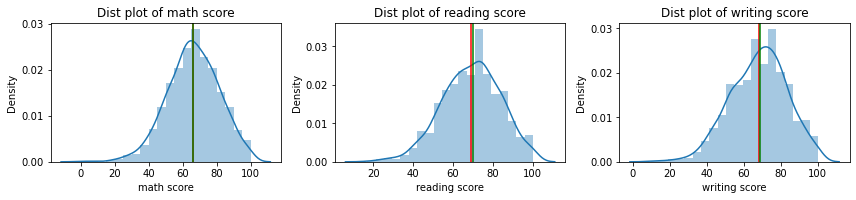

In [13]:
# Univariate analysis:
plt.figure(figsize=(12,10))
index = df.select_dtypes(exclude = 'object').columns
i=1
for j in index:
    plt.subplot(4,3,i)
    sns.distplot(df[j],bins = 20,kde=True)
    plt.axvline(df[j].mean(),color='red')
    plt.axvline(df[j].median(),color = 'green')
    plt.title(f'Dist plot of {j}')
    i += 1
plt.tight_layout()
plt.show()
        

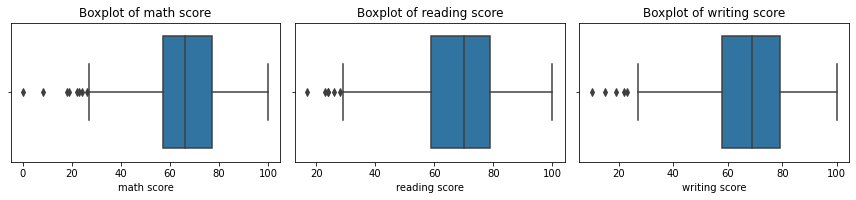

In [14]:
# Univariate analysis:
plt.figure(figsize=(12,10))
index = df.select_dtypes(exclude = 'object').columns
i=1
for j in index:
    plt.subplot(4,3,i)
    sns.boxplot(df[j])
    
    plt.title(f'Boxplot of {j}')
    i += 1
plt.tight_layout()
plt.show()

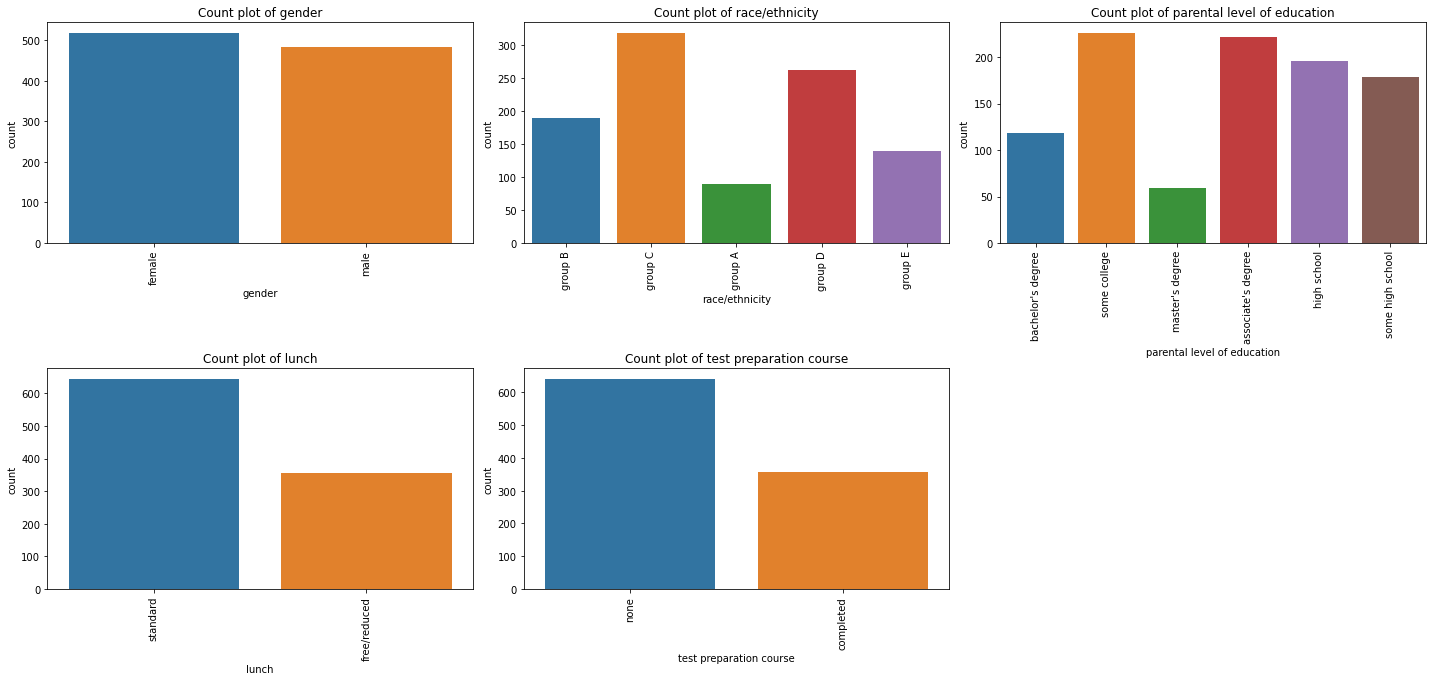

In [15]:
plt.figure(figsize=(20,18))
index = df.select_dtypes(exclude=('int','float')).columns
i=1
for j in index:
    plt.subplot(4,3,i)
    sns.countplot(df[j])
    
    plt.title(f'Count plot of {j}')
    plt.xticks(rotation=90)
    i += 1
plt.tight_layout()
plt.show()

In [16]:
import sidetable as stb

# Gender :

In [17]:
df.stb.freq(['gender'],cum_cols = False)

,gender,count,percent
0,female,518,51.8
1,male,482,48.2


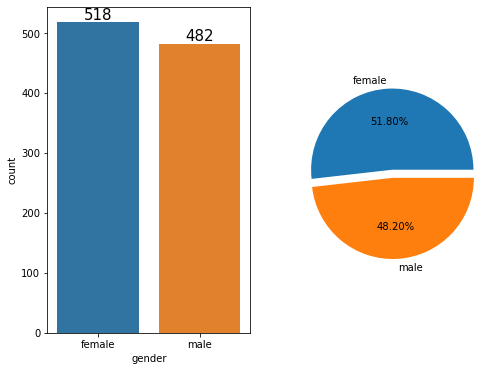

In [18]:
f,ax = plt.subplots(1,2,figsize=(8,6))
sns.countplot(df['gender'],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

plt.pie(x = df['gender'].value_counts(),labels = df['gender'].value_counts().index,autopct="%0.2f%%",explode=[0,0.1])
plt.show()

In [19]:
# Multivariate analysis:

In [20]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

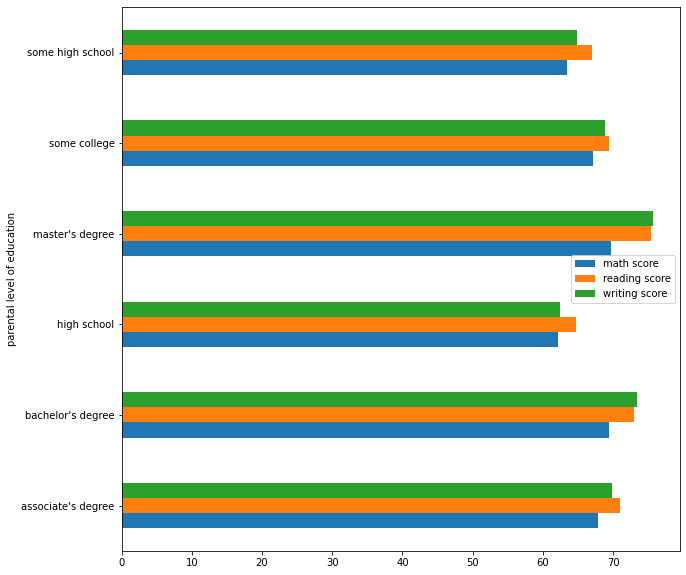

In [21]:
df.groupby(['parental level of education']).agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(loc='right')

In [22]:
# splitting data into dependent and independent variables
x= df.drop(['math score'],axis=1)
y=df['math score']

In [23]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [24]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [25]:
num_features = x.select_dtypes(exclude ='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

# preprocessor = ColumnTransformer([('OneHotEncoder',encoder,cat_features)])
# x = preprocessor.fit_transform(x)
                          

In [26]:
x =pd.get_dummies(columns=cat_features,drop_first=True,data=x)

In [27]:
# splitting the data into train and test:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [30]:
x_train_scaled

array([[ 1.09418908,  0.79628564, -0.98511083, ...,  2.081666  ,
         0.7117523 , -1.34059793],
       [-0.61775504, -0.51758156,  1.01511421, ..., -0.48038446,
        -1.40498317,  0.74593581],
       [ 0.4778892 ,  0.00796532, -0.98511083, ..., -0.48038446,
        -1.40498317,  0.74593581],
       ...,
       [-1.23405492, -1.63436868,  1.01511421, ..., -0.48038446,
         0.7117523 ,  0.74593581],
       [-0.6862328 , -1.17451516,  1.01511421, ..., -0.48038446,
        -1.40498317,  0.74593581],
       [ 0.13550038,  0.79628564, -0.98511083, ..., -0.48038446,
         0.7117523 , -1.34059793]])

In [31]:
from sklearn import set_config

In [32]:
set_config(display='diagram')

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [34]:
lr = LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred_test_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [38]:
r2_score(y_test,y_pred_test_lr)

0.8539032390585748

In [39]:
import statsmodels.api as sm

In [40]:
x_train_sm = sm.add_constant(x_train_scaled)
y_sm = y_train.tolist()

In [41]:
result = sm.OLS(y_sm,x_train_sm).fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     413.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:54:43   Log-Likelihood:                -2474.0
No. Observations:                 800   AIC:                             4978.
Df Residuals:                     785   BIC:                             5048.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0362      0.190    347.034      0.000      65.663      66.410
x1             3.9224      0.705      5.564      0.000       2.538       5.306
x2            10.7345      0.757     14.175      0.000       9.248      12.221
x3             6.8661      0.209     32.869      0.000       6.456       7.276
x4             0.6528      0.300      2.173      0.030       0.063       1.243
x5             0.4839      0.336      1.439      0.151      -0.176       1.144
x6             0.3256      0.325      1.002      0.317      -0.312       0.963
x7             1.9583      0.282      6.950      0.000       1.405       2.511
x8            -0.3491      0.224     -1.558      0.120      -0.789       0.091
x9             0.2088      0.238      0.876      0.381      -0.259       0.677
x10           -0.3103      0.209     -1.484      0.138      -0.721       0.100
x11           -0.0026      0.240     -0.011      0.991      -0.474       0.469
x12            0.1995      0.240      0.833      0.405      -0.271       0.670
x13            1.5347      0.203      7.566      0.000       1.137       1.933
x14            1.7111      0.216      7.920      0.000       1.287       2.135
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.180
Skew:                          -0.031   Prob(JB):                        0.914
Kurtosis:                       2.961   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""